<a href="https://colab.research.google.com/github/ahmedwasfey/clothing-articles-classification/blob/main/notebooks/clothing_article_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!unzip -q "/content/drive/MyDrive/DeepFashion/Category and Attribute Prediction Benchmark/Img/img.zip" -d "/content/DeepFashion/"

crearting the empty df for the data


In [2]:
import pandas as pd
datadf = pd.DataFrame(columns= ["path", "label"])
datadf

,path,label


extracting the label from the parent folder name and filling the df with paths and annotations

In [14]:
import os 
lables_set = set()
data = {
    "path" :[],
    "label":[]
}
idx= 0
for dirpath , dirname , files in os.walk("/content/DeepFashion/"):
  idx +=1
  label = dirpath.split("_")[-1]
  lables_set.add(label)
  print(f"{idx} dirpath=  {dirpath}, dirname= {dirname} , label = {label}")
  for filename in files : 
    if filename.endswith(".jpg"):
      data["path"].append(os.path.join(dirpath ,filename ))
      data['label'].append(label)
    # datadf = datadf.append(pd.Series([, label]), ignore_index = True )
  datadf= pd.DataFrame.from_dict(data)

Streaming output truncated to the last 5000 lines.
624 dirpath=  /content/DeepFashion/img/Open-Front_Dolman_Cardigan, dirname= [] , label = Cardigan
625 dirpath=  /content/DeepFashion/img/Embroidered_Babydoll_Dress, dirname= [] , label = Dress
626 dirpath=  /content/DeepFashion/img/Pleated_Pinstripe_Shorts, dirname= [] , label = Shorts
627 dirpath=  /content/DeepFashion/img/Sheer-Sleeved_Pleated_Romper, dirname= [] , label = Romper
628 dirpath=  /content/DeepFashion/img/Guns_N_Roses_Racerback_Tank, dirname= [] , label = Tank
629 dirpath=  /content/DeepFashion/img/Crepe_Woven_A-line_Dress, dirname= [] , label = Dress
630 dirpath=  /content/DeepFashion/img/Cuffed_Colorblock_Sweatpants, dirname= [] , label = Sweatpants
631 dirpath=  /content/DeepFashion/img/Textured_Zigzag_Bodycon_Dress, dirname= [] , label = Dress
632 dirpath=  /content/DeepFashion/img/Time_To_Shine_Tee, dirname= [] , label = Tee
633 dirpath=  /content/DeepFashion/img/DEFYANT_D_Graphic_Tee, dirname= [] , label = Tee
634 

In [16]:
import pandas as pd
CSV_PATH = "/content/drive/MyDrive/tahaluf/fashion_annotated_data.csv"
datadf = pd.read_csv(CSV_PATH)
datadf.head()

,Unnamed: 0,path,label
0,0,/content/DeepFashion/img/Paint_It_Red_Wanderlu...,Dress
1,1,/content/DeepFashion/img/Paint_It_Red_Wanderlu...,Dress
2,2,/content/DeepFashion/img/Paint_It_Red_Wanderlu...,Dress
3,3,/content/DeepFashion/img/Paint_It_Red_Wanderlu...,Dress
4,4,/content/DeepFashion/img/Paint_It_Red_Wanderlu...,Dress


In [17]:
datadf = datadf.sample(frac=0.6)

In [17]:
datadf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289229 entries, 0 to 289228
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  289229 non-null  int64 
 1   path        289229 non-null  object
 2   label       289229 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [14]:
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *
from fastai.imports import *
import gc 
import pandas as pd

%matplotlib inline
data = ImageDataLoaders.from_csv(path="..",
                                 fn_col = "path", 
                                 label_col ="label",
                                 item_tfms=Resize(300),
                                 csv_fname=r"/content/drive/MyDrive/tahaluf/fashion_annotated_data.csv")

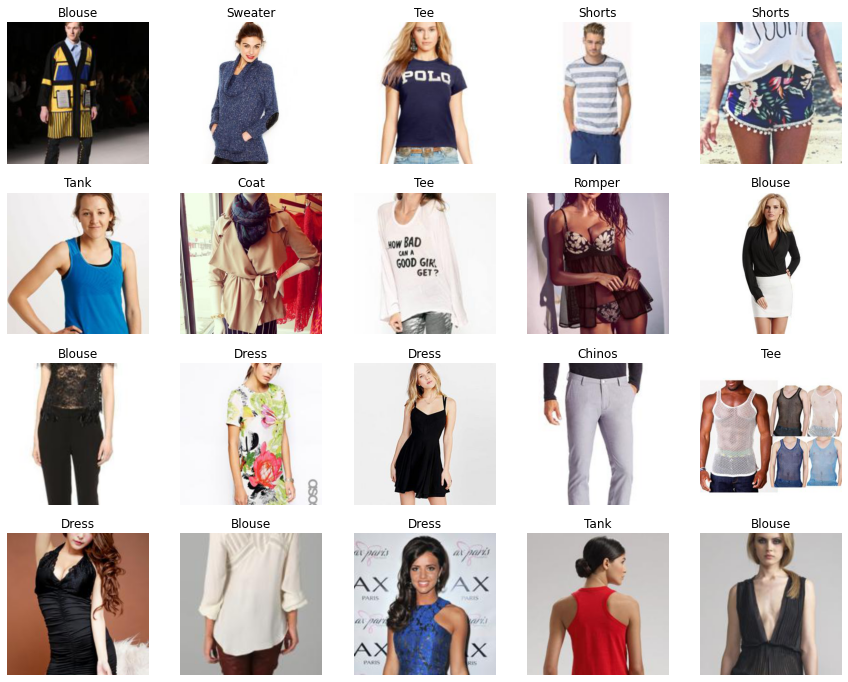

In [5]:
data.show_batch(max_n=20 )

In [4]:
classes = set(datadf["label"])
num_classes = len(classes)
print(f"classes = {classes} number of classes {num_classes}")

classes = {'Jersey', 'Culottes', 'Shorts', 'Coverup', 'Dress', 'Jodhpurs', 'Cutoffs', 'Capris', 'Anorak', 'Blouse', 'Trunks', 'Onesie', 'Poncho', 'Blazer', 'Skirt', 'Jacket', 'Leggings', 'Jeans', 'Robe', 'Tank', 'Sweater', 'Button-Down', 'Chinos', 'Caftan', 'Sweatpants', 'Cardigan', 'Jumpsuit', 'Sweatshorts', 'Parka', 'Kaftan', 'Joggers', 'Hoodie', 'Coat', 'Henley', 'Kimono', 'Turtleneck', 'Jeggings', 'Bomber', 'Peacoat', 'Top', 'Sarong', 'Gauchos', 'Tee', 'Halter', 'Flannel', 'Romper'} number of classes 46


In [5]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten ,GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [18]:
from sklearn.model_selection import train_test_split

# create the image data generator
data_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split =0.1,
    )
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True)
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(datadf.path.values, datadf.label.values, test_size=0.2, random_state=42)

print(f"# of train samples {len(X_train)}, # of test samples {len(X_test)}")

# of train samples 231383, # of test samples 57846


In [46]:
# define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.build()
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 128)     

In [26]:
# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
X_train[:20], y_train[:20]

(array(['/content/DeepFashion/img/Embroidered_Floral_Shorts/img_00000011.jpg',
        '/content/DeepFashion/img/Tribal_Print_Shorts/img_00000021.jpg',
        '/content/DeepFashion/img/Watercolor_Abstract_Print_Blouse/img_00000065.jpg',
        '/content/DeepFashion/img/Bandana_Print_Sweatpants/img_00000059.jpg',
        '/content/DeepFashion/img/Crocheted_Tonal-Patterned_Cardigan/img_00000006.jpg',
        '/content/DeepFashion/img/Retro_Floral_Blouse/img_00000105.jpg',
        '/content/DeepFashion/img/Knit_Romper/img_00000035.jpg',
        '/content/DeepFashion/img/Butterfly_Print_Blouse/img_00000082.jpg',
        '/content/DeepFashion/img/Rainbow_Print_Running_Shorts/img_00000005.jpg',
        '/content/DeepFashion/img/Neon_Dreams_Bandage_Skirt/img_00000005.jpg',
        '/content/DeepFashion/img/Tasseled_Neckline_Stripe_Blouse/img_00000022.jpg',
        '/content/DeepFashion/img/Beaded_Chiffon_Blouse/img_00000084.jpg',
        '/content/DeepFashion/img/Striped_Knit_Tee/img_000000

In [36]:
# define callbacks
early_stop = EarlyStopping(patience=3, restore_best_weights= True)
history02 = model.fit(data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_train, 'label': y_train}),
                                                        directory='',
                                                        x_col='path',
                                                        y_col='label',
                                                        target_size= (256, 256),
                                                        batch_size=32 , 
                                                 subset="training"),
                             epochs=128,
                             callbacks=[early_stop], 
                            validation_data= data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_train, 'label': y_train}),
                                                        directory='',
                                                        x_col='path',
                                                        y_col='label',
                                                        target_size= (256, 256),
                                                        batch_size=32 , 
                                                 subset="validation") )

Found 208245 validated image filenames belonging to 46 classes.
Found 23138 validated image filenames belonging to 46 classes.
Epoch 1/128
4712/6508 [====================>.........] - ETA: 2:18 - loss: 1.6663 - accuracy: 0.5071

KeyboardInterrupt: ignored

In [35]:
_, test_acc = model.evaluate(data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'label': y_test}),
                                                        directory='',
                                                        x_col='path',
                                                        y_col='label',
                                                        target_size= (256, 256),
                                                        batch_size=32), verbose=0)
print('Test accuracy: {:.4f}'.format(test_acc))


Found 57846 validated image filenames belonging to 46 classes.
Test accuracy: 0.4784


In [30]:
model.save("/content/drive/MyDrive/tahaluf/fashion_model")

In [44]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/tahaluf/fashion_model")


In [38]:
import time 
t1 = time.time()
preds = model.predict_generator(data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'label': y_test}),
                                                        directory='',
                                                        x_col='path',
                                                        y_col='label',
                                                        target_size= (256, 256),
                                                        batch_size=32))
t2= time.time()
t2-t1

Found 57846 validated image filenames belonging to 46 classes.


<ipython-input-38-039fae6670ab>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'label': y_test}),


136.30427408218384

In [40]:
preds.shape

(57846, 46)

In [45]:
ytrue = []
for i , s in data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'label': y_test}),
                                                        directory='',
                                                        x_col='path',
                                                        y_col='label',
                                                        target_size= (256, 256),
                                                        batch_size=32):
  for single_sample in s : ytrue.append(single_sample)
ytrue= np.array(ytrue)
ytrue.shape

Found 57846 validated image filenames belonging to 46 classes.


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report
classification_report(np.argmax(ytrue, axis =1 ), np.argmax(preds, axis =1 ))

In [37]:
# Calculate Receptive Field
receptive_field = 1
for layer in model.layers:
    if "conv" in layer.name:
        kernel_size = layer.kernel_size[0]
        stride = layer.strides[0]
        dilation = layer.dilation_rate[0]
        receptive_field += (kernel_size - 1) * dilation
        receptive_field += (receptive_field - 1) * (stride - 1)

print("Receptive Field: ", receptive_field)





Receptive Field:  7
